In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load CSV file into the df
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preparation

In [3]:
# EDA
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [5]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Drop [IsTrading] column
crypto_df = crypto_df.drop(columns ='IsTrading')

In [7]:
# Check null values
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
# Remove rows with null values
crypto_df = crypto_df.dropna()

In [9]:
# Verify nulls are dropped
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Save CoinName column for t-SNE
CoinName=pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [12]:
# Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the dataframe.
crypto_df.drop(columns='CoinName', axis=1, inplace= True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Drop Unamed:0 columns
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [14]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# View column names 
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [16]:
# Standarize dataset
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [17]:
# Number of features in datast
len(X.columns)

98

### Dimensionality Reduction

#### PCA

In [18]:
## Applying PCA to reduce dimensions from 98 to 4
# Initialize model 
pca = PCA(n_components=4)

# Get three principal components for the crypto data.
crypto_pca1 = pca.fit_transform(crypto_scaled)

In [19]:
# Transform PCA data to a DataFrame
df_crypto_pca1 = pd.DataFrame(data=crypto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
df_crypto_pca1.head()

,PC 1,PC 2,PC 3,PC4
0,-0.338299,1.044812,-0.601411,0.002375
1,-0.321642,1.044934,-0.601796,0.002427
2,2.309815,1.649141,-0.692018,-0.011913
3,-0.138993,-1.324117,0.189977,0.015116
4,-0.149367,-2.066038,0.416001,-0.004643


In [20]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.02793105, 0.0214082 , 0.0205032 , 0.02044451])

According to the explained variance, each principal component contains approximately ~.02% of the variance. With only four features, we have a very small amount of the information in the original dataset. We will need to increase the number of principal components to increase the explained variance. 

In [114]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

# Get three principal components for the crypto data.
crypto_pca = pca2.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.46532550e-15,  5.62343533e-15,  1.49507977e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.63645692e-15,  5.25359408e-15,  2.25718281e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.75066626e-14, -1.17632711e-13, -5.02829165e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         4.92696433e-14,  2.74532450e-14,  1.56967958e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.63533220e-15, -4.69781528e-16,  1.17522750e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.05646641e-15,  1.05006748e-15,  4.14908459e-15]])

In [22]:
# Transform PCA data to a DataFrame
transformed_crypto_pca = pd.DataFrame(data=crypto_pca)
transformed_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,8.903525e-15,3.715567e-12,-1.716189e-14,-0.007129,-1.319756,-0.051813,...,-2.210782e-16,-6.883168e-16,2.282140e-15,-3.661557e-15,1.430694e-15,5.554638e-16,-1.785268e-15,-4.465325e-15,5.623435e-15,1.495080e-16
1,-0.318434,1.032331,-0.591126,0.001386,8.797456e-15,3.685202e-12,-1.704862e-14,-0.007739,-1.322514,-0.056674,...,7.921450e-17,-1.120989e-15,2.525930e-15,-3.381113e-15,1.239842e-15,6.577914e-16,-2.151362e-15,-3.636457e-15,5.253594e-15,2.257183e-16
2,2.305468,1.656383,-0.683617,0.004731,1.292867e-14,1.259214e-11,-2.400344e-14,-0.054781,-1.542879,-0.943951,...,8.752073e-15,-2.234103e-14,-6.428405e-14,9.620581e-14,-3.895231e-14,-7.626327e-14,8.570577e-14,7.750666e-14,-1.176327e-13,-5.028292e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.452485e-15,-3.268574e-12,4.249357e-15,-0.002071,0.281463,0.251862,...,-2.655003e-15,-1.002527e-14,-1.523596e-14,9.069222e-15,-5.517559e-15,-1.035821e-14,9.738669e-15,1.904873e-14,-1.020151e-14,-3.457047e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-1.119309e-14,-4.534708e-12,1.170787e-14,0.027735,0.519099,0.188820,...,-6.843734e-14,-1.448754e-13,-7.952353e-14,-1.067494e-14,9.885849e-14,2.217027e-14,2.412023e-14,-5.247630e-14,3.685091e-14,-4.261416e-14


In [23]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.02793105, 0.0214082 , 0.0205032 , 0.02044451])

([<matplotlib.axis.XTick at 0x1755a4dbdc0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

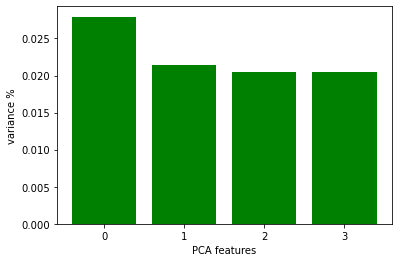

In [24]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [25]:
# Number of features
len(transformed_crypto_pca.columns)

74

With 74 principal components, we have 90% of the information in the original dataset.

#### Further reduce the dataset dimensions with t-SNE

In [26]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [27]:
# Reduce dimensionsa and check that dimensions have been reduced to two
tsne_features = tsne.fit_transform(transformed_crypto_pca)
tsne_features.shape

(532, 2)

With t-SNE features are reduced to two. 

In [28]:
# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

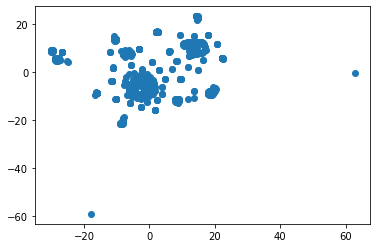

In [29]:
# Plot the results
plt.scatter(x, y)
plt.show()

### Cluster Analysis with k-Means

C:\Users\laure\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


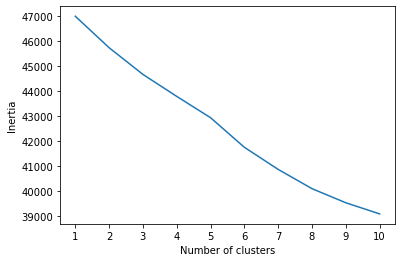

In [30]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values from 1-10
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

There is no clear elbow in the graph, or K beyond which the inertia doesn't change much. Therefore, I will either need to select a number of clusters based on business needs, or use the silhouette score to find the optimal number of clusters based on the data. 

In [31]:
df_elbow.head(10) 

,k,inertia
0,1,46979.075160
1,2,45721.568263
2,3,44654.794841
3,4,43776.296588
4,5,42924.767666
5,6,41741.705420
6,7,40858.331730
7,8,40088.651562
8,9,39525.486844
9,10,39080.089920


### Checking Correlation

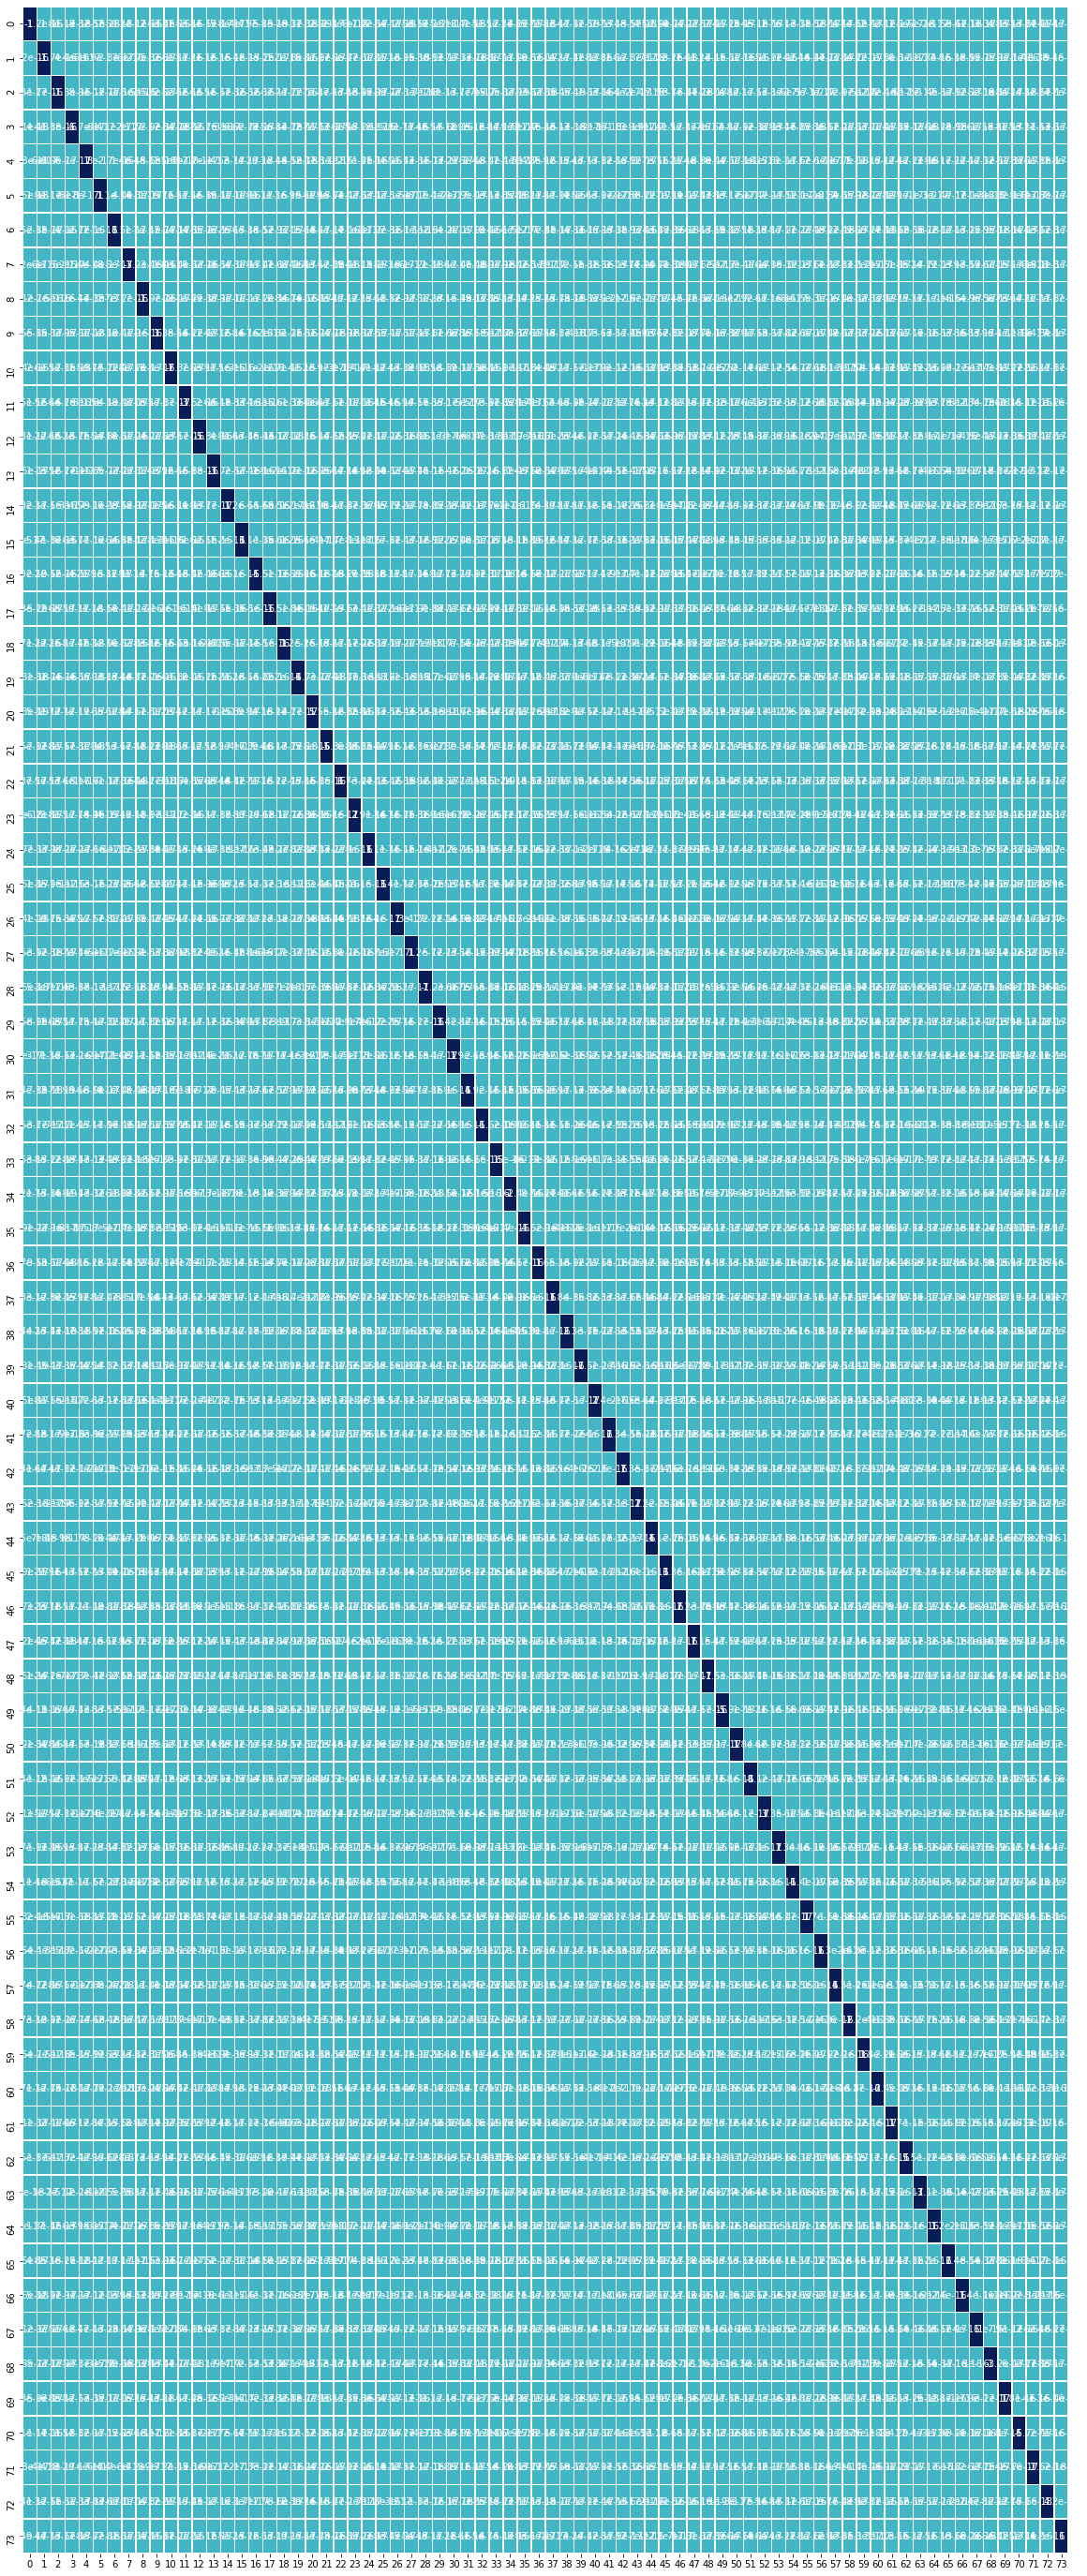

In [32]:
import seaborn as sns
# Heat map to identify highly correlated variables
plt.figure(figsize=(20,50))
sns.heatmap(transformed_crypto_pca.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

The Correlation Matrix shows that PCA still provides too many features (74) to show which variables are highly correlated to their adjusted scores. Too many features can introduce a lot of noise making it difficult for algorithms to perform well on the data.  Given more time, the number of features would be reduced for this model. 

### Silhouette Score

The Silhouette score is used to measure the degree of separation between clusters. Silhouette score observing the local maxima is used to determine the optimum number of clusters along with the Elbow plot. 

For n_clusters = 2 The average silhouette_score is : 0.7030409060972517
For n_clusters = 3 The average silhouette_score is : 0.6798963207883358
For n_clusters = 4 The average silhouette_score is : 0.6805479707936355
For n_clusters = 5 The average silhouette_score is : 0.03011831920506921
For n_clusters = 6 The average silhouette_score is : 0.6211378699539842
For n_clusters = 7 The average silhouette_score is : 0.2873039727711594
For n_clusters = 8 The average silhouette_score is : 0.01494985642328144
For n_clusters = 9 The average silhouette_score is : 0.027634689247430313
For n_clusters = 10 The average silhouette_score is : -0.06955028693650127


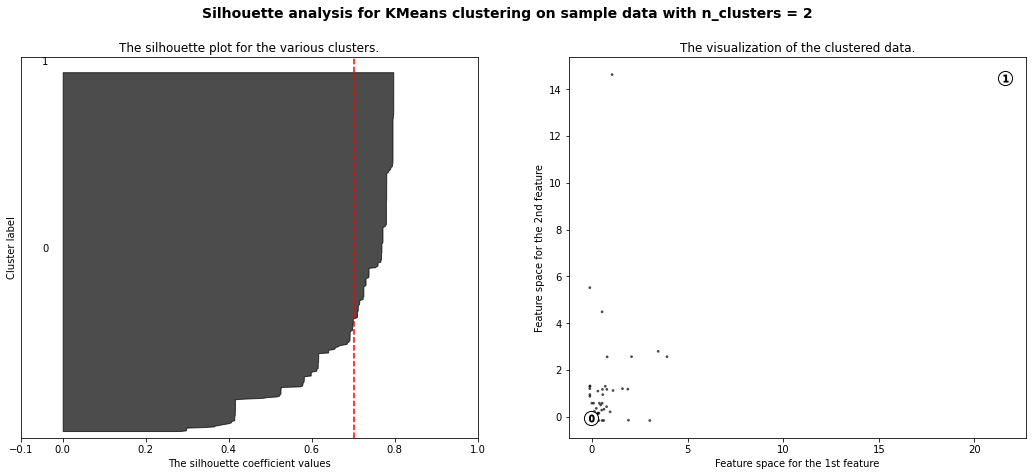

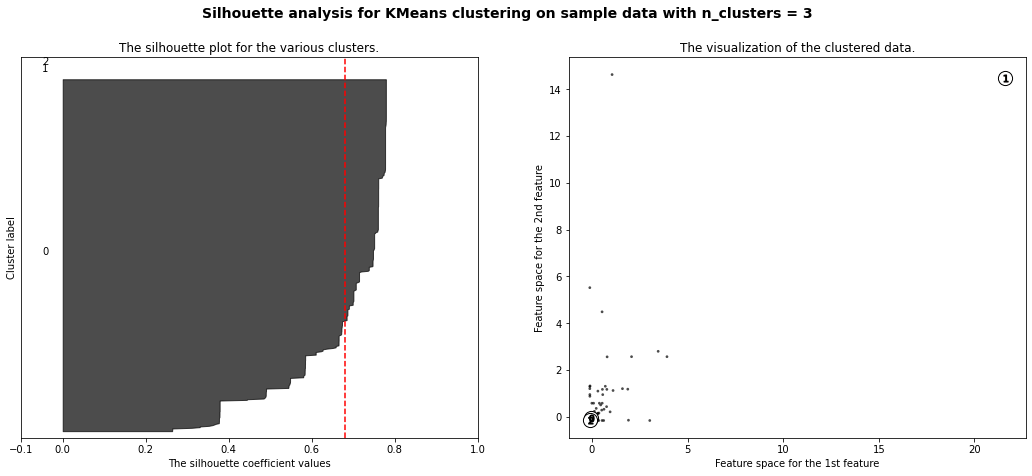

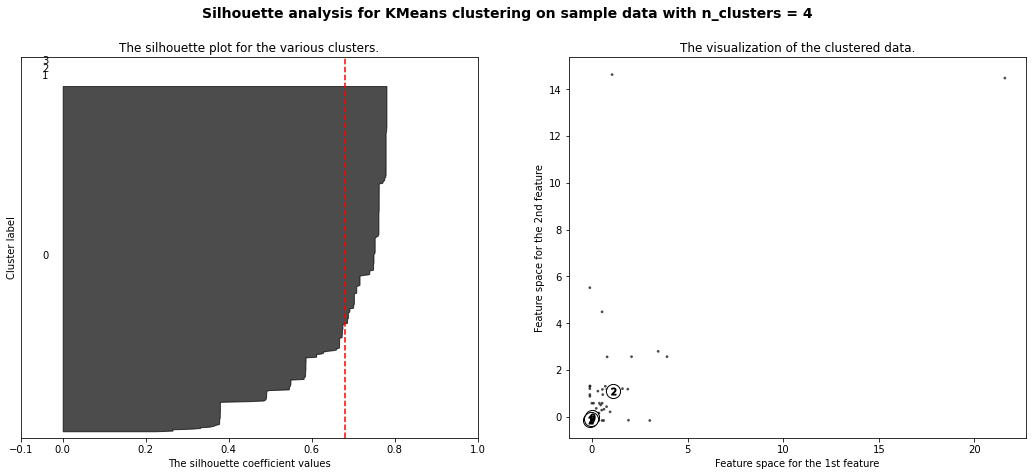

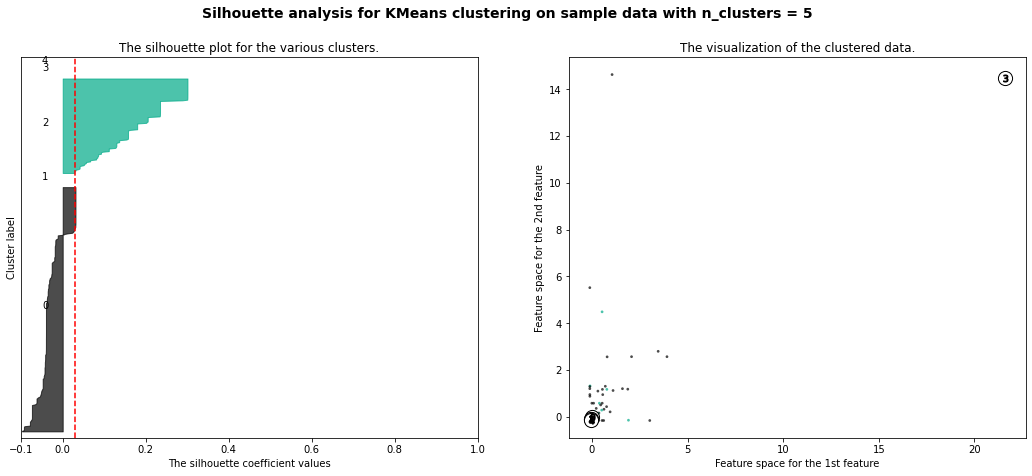

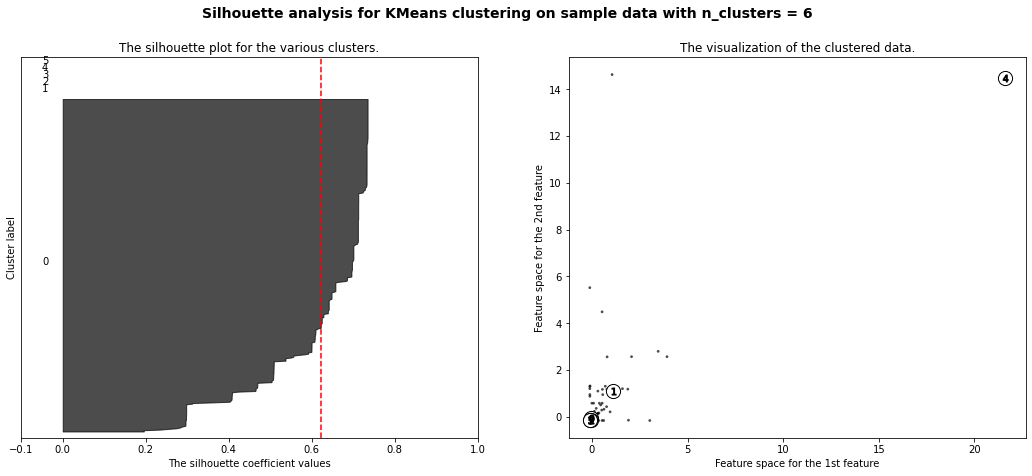

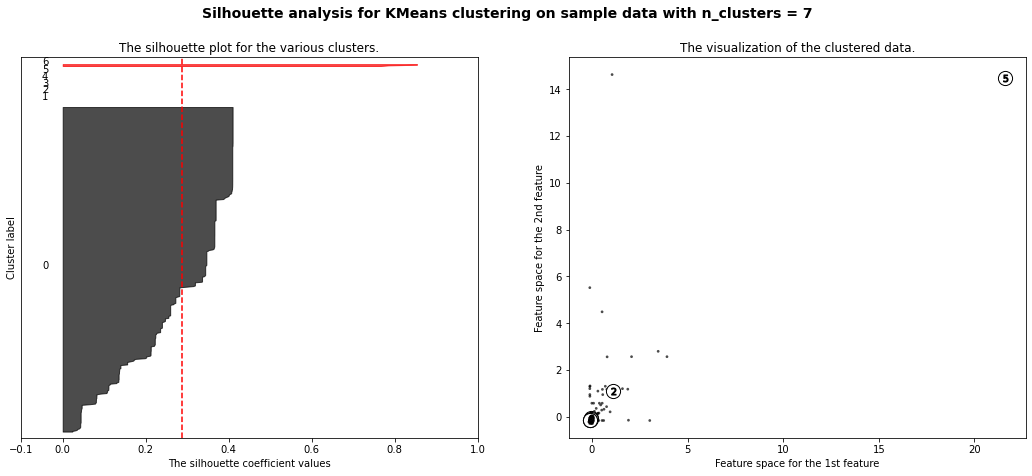

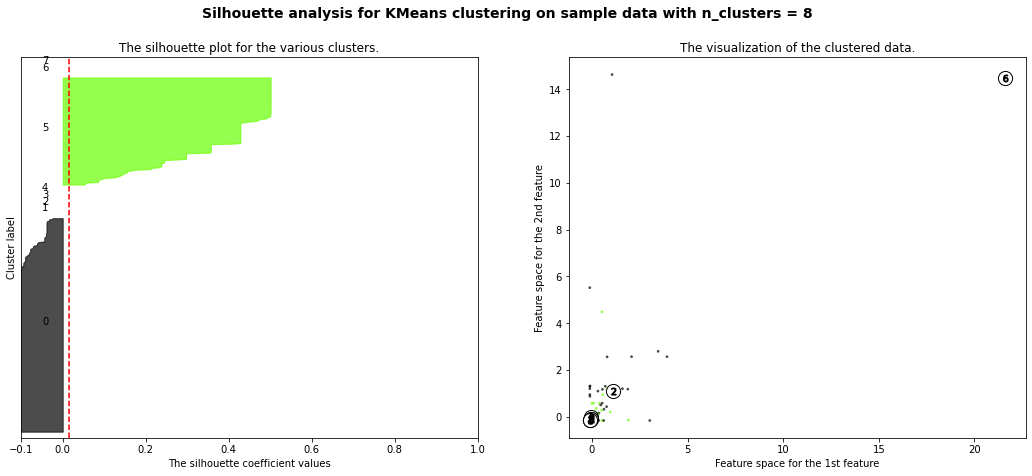

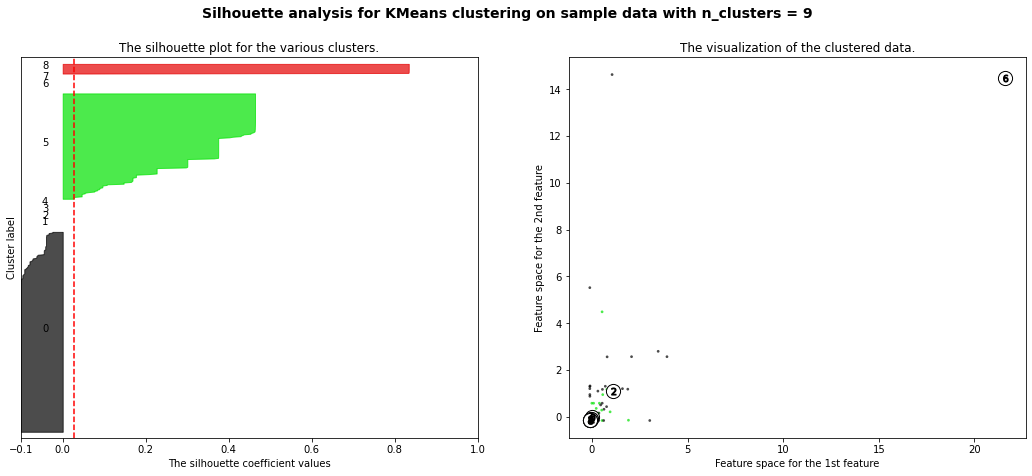

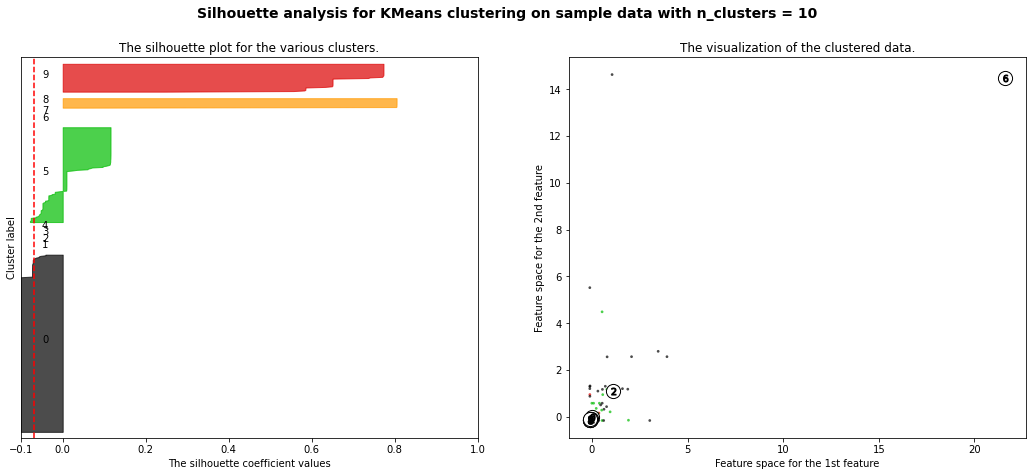

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.01, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(crypto_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(crypto_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(crypto_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(crypto_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        crypto_scaled[:, 0], crypto_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show();

Based on the Silhouette score, K=2, K=3 or K=4 could be chosen. I have decided to use K=4.  

#### Predicting clusters with k=4

In [121]:
k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df

,0,1
0,10.329082,11.231301
1,16.271280,8.087572
2,14.569647,21.558632
3,-28.898865,5.310801
4,-10.331606,-11.419620
...,...,...
527,-25.324495,4.375210
528,16.204979,11.564028
529,-8.836173,-21.215250
530,-15.894641,-8.854255


In [122]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means_df)

# Predict clusters
predictions = model.predict(k_means_df)

# Create return DataFrame with predicted clusters
k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,10.329082,11.231301,2
1,16.271280,8.087572,2
2,14.569647,21.558632,2
3,-28.898865,5.310801,1
4,-10.331606,-11.419620,3


In [131]:
# Check class value counts
k_means_df['class'].value_counts()

3    195
2    142
1    112
0     83
Name: class, dtype: int64

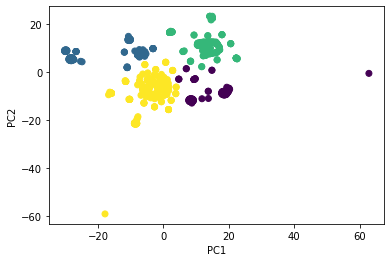

In [126]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Clusters are clearly defined into four groups. 

In [151]:
# Add CoinName to df
final_df = pd.concat([CoinName, k_means_df],axis=1, sort=False)
final_df                         

,CoinName,0,1,class
0,42 Coin,10.329082,11.231301,2
1,404Coin,16.271280,8.087572,2
2,EliteCoin,14.569647,21.558632,2
3,Bitcoin,-28.898865,5.310801,1
4,Ethereum,-10.331606,-11.419620,3
...,...,...,...,...
527,ZEPHYR,-25.324495,4.375210,1
528,Gapcoin,16.204979,11.564028,2
529,Beldex,-8.836173,-21.215250,3
530,Horizen,-15.894641,-8.854255,3


In [149]:
# Analyze dataset by class
class_one = final_df.loc[final_df['class'] == 1]
class_one

,CoinName,0,1,class
3,Bitcoin,-28.898865,5.310801,1
12,BitcoinDark,-30.221066,8.797337,1
13,PayCoin,-26.714014,8.435744,1
22,ZetaCoin,-28.273281,5.235224,1
37,DevCoin,-27.402458,5.066467,1
...,...,...,...,...
522,TigerCash,-26.713808,8.435618,1
524,Particl,-10.172548,13.611890,1
526,Nxt,-10.694955,14.743449,1
527,ZEPHYR,-25.324495,4.375210,1


In [154]:
# Save cluster dataframes as csv files
for i in range(0,4):
    cluster = final_df.loc[final_df['class'] == i]
    cluster.to_csv(f"clusters/crypto_portfolio{i}.csv")

In [153]:
# global average of total coins mined
import numpy as np

total_coins_mined_avg = crypto_df['TotalCoinsMined'].mean()
total_coins_mined_avg

5340455863.317298

### Recommendation

Based on my findings, cryptocurrencies can be clustered together into 4 distinct groups. Cluster results are grouped into csv files in the Clusters folder for further analysis. 

Given more time, I would analyze these clusters for segmentation trends, looking at the global average of total coins mined and total coin supply, data compared to class average for each column.
